In [48]:
!pip install ase
!pip install pymatgen

In [49]:
!echo "Si8" > POSCAR_Si
!echo "1.0" >> POSCAR_Si
!echo "   5.4437023729394527    0.0000000000000000    0.0000000000000003" >> POSCAR_Si
!echo "   0.0000000000000009    5.4437023729394527    0.0000000000000003" >> POSCAR_Si
!echo "   0.0000000000000000    0.0000000000000000    5.4437023729394527" >> POSCAR_Si
!echo "Si" >> POSCAR_Si
!echo "8" >> POSCAR_Si
!echo "Direct" >> POSCAR_Si
!echo "   0.7500000000000000    0.7500000000000000    0.2500000000000000 Si" >> POSCAR_Si
!echo "   0.0000000000000000    0.5000000000000000    0.5000000000000000 Si" >> POSCAR_Si
!echo "   0.7500000000000000    0.2500000000000000    0.7500000000000000 Si" >> POSCAR_Si
!echo "   0.0000000000000000    0.0000000000000000    0.0000000000000000 Si" >> POSCAR_Si
!echo "   0.2500000000000000    0.7500000000000000    0.7500000000000000 Si" >> POSCAR_Si
!echo "   0.5000000000000000    0.5000000000000000    0.0000000000000000 Si" >> POSCAR_Si
!echo "   0.2500000000000000    0.2500000000000000    0.2500000000000000 Si" >> POSCAR_Si
!echo "   0.5000000000000000    0.0000000000000000    0.5000000000000000 Si" >> POSCAR_Si

!echo "Si3 O6" > POSCAR_SiO2
!echo "1.0" >> POSCAR_SiO2
!echo " 2.4574830883638521   -4.2564855677874682    0.0000000000000000" >>POSCAR_SiO2
!echo " 2.4574830883638521    4.2564855677874682    0.0000000000000000" >>POSCAR_SiO2
!echo " 0.0000000000000000    0.0000000000000000    5.4313011400000004" >>POSCAR_SiO2
!echo "Si O" >>POSCAR_SiO2
!echo "3  6" >>POSCAR_SiO2
!echo "Direct" >>POSCAR_SiO2
!echo "  0.5310885900000000    0.5310885900000000    0.0000000000000000 Si4+" >>POSCAR_SiO2
!echo "  0.0000000000000000    0.4689114100000000    0.6666666666666666 Si4+" >>POSCAR_SiO2
!echo "  0.4689114100000000    0.0000000000000000    0.3333333333333333 Si4+" >>POSCAR_SiO2
!echo "  0.2692231100000000    0.4133942900000000    0.7848909800000000 O2-" >>POSCAR_SiO2
!echo "  0.5866057099999999    0.8558288199999999    0.1182243133333334 O2-" >>POSCAR_SiO2
!echo "  0.1441711800000000    0.7307768900000000    0.4515576466666666 O2-" >>POSCAR_SiO2
!echo "  0.4133942900000000    0.2692231100000000    0.2151090200000000 O2-" >>POSCAR_SiO2
!echo "  0.7307768900000000    0.1441711800000000    0.5484423533333334 O2-" >>POSCAR_SiO2
!echo "  0.8558288199999999    0.5866057099999999    0.8817756866666666 O2-" >>POSCAR_SiO2

In [50]:
from ase.io import read, write

base = read('POSCAR_SiO2',format='vasp')
base.cell[2][2] += 10
write('POSCAR_2.vasp',images=base,format='vasp')
base2 = read('POSCAR_2.vasp',format='vasp')

base = read('POSCAR_Si',format='vasp')
base.cell[2][2] += 10
write('POSCAR_2.vasp',images=base,format='vasp')
base2 = read('POSCAR_2.vasp',format='vasp')

In [51]:
from pymatgen.io.vasp import Poscar
from pymatgen.analysis.diffraction import xrd

XRD = xrd.XRDCalculator(wavelength='CuKa')

ref_xrd = XRD.get_pattern(Poscar.from_file("POSCAR_Si").structure,two_theta_range=(10, 90))
ref_xrd = ref_xrd.as_dict()

test_xrd = XRD.get_pattern(Poscar.from_file("POSCAR_2.vasp").structure,two_theta_range=(10, 90))
test_xrd = test_xrd.as_dict()

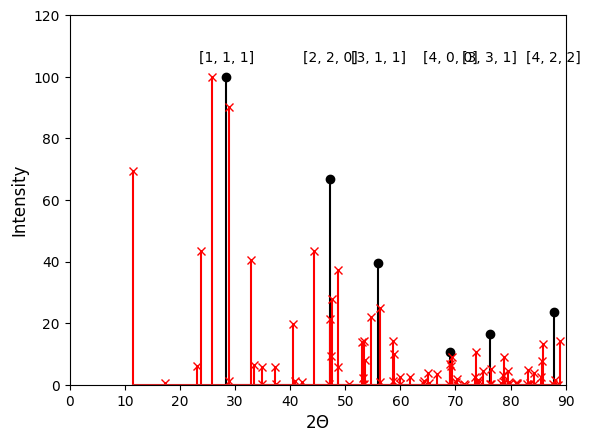

In [52]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.stem(ref_xrd['x'],ref_xrd['y'],'k',markerfmt='ko')
ax.stem(test_xrd['x'],test_xrd['y'],'r',markerfmt='rx')
for idx,item in enumerate(ref_xrd['hkls']):
    ax.text(ref_xrd['x'][idx],105,f'{item[0]["hkl"]}',ha='center',fontsize=10)
ax.set_xlabel(r'2$\mathrm{\Theta}$',fontsize=12)
ax.set_ylabel('Intensity',fontsize=12)
ax.set_xlim([0,90])
ax.set_ylim([0,120])
plt.show()

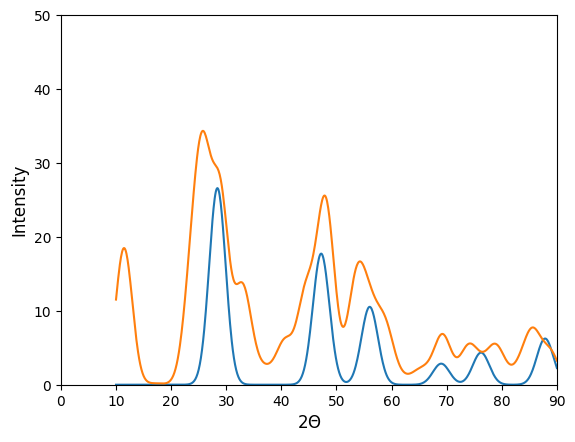

In [53]:
import numpy as np
def gaussian(x,m,s):
    return np.exp(-(x-m)**2/(2*s**2))/np.sqrt(2*np.pi*s**2)

x = np.linspace(10,90,801)
y_ref = np.zeros(len(x))
y_test = np.zeros(len(x))
sigma = 1.5

fig, ax = plt.subplots()
for idx,item in enumerate(ref_xrd['hkls']):
    y_ref  += ref_xrd['y'][idx]*gaussian(x,ref_xrd['x'][idx],sigma)
for idx,item in enumerate(test_xrd['hkls']):
    y_test += test_xrd['y'][idx]*gaussian(x,test_xrd['x'][idx],sigma)
ax.plot(x,y_ref)
ax.plot(x,y_test)
ax.set_xlabel(r'2$\mathrm{\Theta}$',fontsize=12)
ax.set_ylabel('Intensity',fontsize=12)
ax.set_xlim([0,90])
ax.set_ylim([0,50])
plt.show()